In [189]:
###### generating regration
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

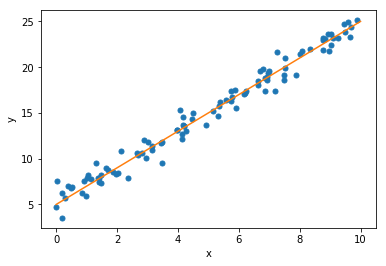

In [190]:
n=100 #number of data point
b1 = 5
b2 = 2
np.random.seed(1)
x = 10*ss.uniform.rvs(size=n)
y = b1+b2*x + ss.norm.rvs(loc=0,scale=1,size=n)
plt.plot(x,y,"o",ms=5)
xx = np.array([0,10])
plt.plot(xx,b1+b2*xx)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("Example_Regration.pdf")

In [191]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n) 

In [192]:
np.mean(x)

4.8587792760014565

In [193]:
np.mean(y)

14.80142786070299

In [194]:
#def compute_rss(y_estimate, y):
  #return sum(np.power(y-y_estimate, 2))

#def estimate_y(x, b_0, b_1):
  #return b_0 + b_1 * x

#rss = compute_rss(estimate_y(x, beta_0, beta_1), y) 

In [195]:
#least squared estimation in  regression
rss = []
slopes = np.arange(-10, 15, 0.01)
#slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y-b1-slope*x)**2))

In [196]:
rss[0:15]

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741,
 457447.22184912727,
 456679.1316202565,
 455911.68689066224,
 455144.8876603442,
 454378.73392930237]

In [197]:
ind_min=np.argmin(rss)

In [198]:
ind_min

1200

In [199]:
print("estimated value for rss",slopes[rss_min])

estimated value for rss 1.9999999999997442


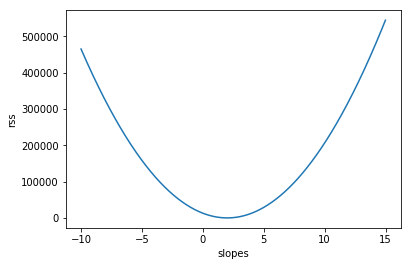

In [200]:
plt.figure()
plt.plot(slopes,rss)
plt.xlabel("slopes")
plt.ylabel("rss")
plt.savefig("LeastsqrEstimation.pdf")

In [201]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2974.
Date:                Fri, 23 Nov 2018   Prob (F-statistic):           1.14e-75
Time:                        14:25:42   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7569      0.051     54.538      0.0

In [202]:
X=sm.add_constant(x)
mod = sm.OLS(y,X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 23 Nov 2018   Prob (F-statistic):           7.47e-82
Time:                        14:25:45   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

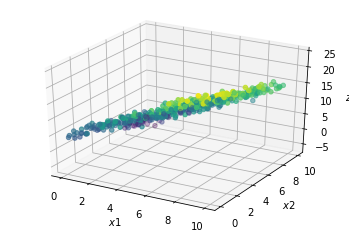

In [203]:
from mpl_toolkits.mplot3d import Axes3D
n=500
b1=5
b2=2
b3=-1
np.random.seed(1)
x1 = 10*ss.uniform.rvs(size=n)
x2 = 10*ss.uniform.rvs(size=n)
y = b1+b2*x1+b3*x2 + ss.norm.rvs(loc=0,scale=1,size=n)
X = np.stack([x1,x2],axis=1)
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],y,c=y)
ax.set_xlabel("$x1$")
ax.set_ylabel("$x2$")
ax.set_zlabel("$z$")
plt.savefig("LinearRegration3Dplot.pdf")

In [204]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
lm.intercept_

5.1540777637772495

In [206]:
print(lm.coef_[0])
print(lm.coef_[1])

1.9999378989891408
-1.0202644869933357


In [209]:
X_0 = np.array([2,4])
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [210]:
lm.score(X,y)

0.9798997316600129

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,random_state=1)

/home/yuvraj/local-py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [212]:
lm =LinearRegression(fit_intercept=True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
lm.score(X_test,y_test)

0.9794930834681773